In [206]:
import pandas as pd 
import numpy as np 
from ydata_profiling  import ProfileReport
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [119]:
iter = pd.read_csv("penguins_lter.csv").drop(columns=["Region", "Stage","Comments"])
size = pd.read_csv("penguins_size.csv", names=[
    'Species',
    'Island',
    'Culmen Length (mm)',
    'Culmen Depth (mm)',
    'Flipper Length (mm)',
    'Body Mass (g)',
    'Sex'
], dtype={
    'Culmen Length (mm)': "float64",
    'Culmen Depth (mm)' : "float64",   
    'Flipper Length (mm)' : "float64", 
    'Body Mass (g)' : "float64"
}, skiprows=1)


In [120]:
iter.isna().sum()

studyName               0
Sample Number           0
Species                 0
Island                  0
Individual ID           0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [121]:
size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [122]:
iter["Culmen Length (mm)"] = iter["Culmen Length (mm)"].fillna(np.mean(iter["Culmen Length (mm)"]))
iter["Culmen Depth (mm)"] = iter["Culmen Depth (mm)"].fillna(np.mean(iter["Culmen Depth (mm)"]))
iter["Body Mass (g)"] = iter["Body Mass (g)"].fillna(np.mean(iter["Body Mass (g)"]))
iter["Flipper Length (mm)"] = iter["Flipper Length (mm)"].fillna(np.mean(iter["Flipper Length (mm)"]))
iter["Sex"] = iter["Sex"].fillna("MALE")

iter["Delta 13 C (o/oo)"].fillna(-25.6862915407855, inplace=True)
iter["Delta 15 N (o/oo)"].fillna(iter["Delta 15 N (o/oo)"].mean(), inplace= True)

size["Culmen Length (mm)"] = size["Culmen Length (mm)"].fillna(np.mean(size["Culmen Length (mm)"]))
size["Culmen Depth (mm)"] = size["Culmen Depth (mm)"].fillna(np.mean(size["Culmen Depth (mm)"]))
size["Body Mass (g)"] = size["Body Mass (g)"].fillna(np.mean(size["Body Mass (g)"]))
size["Flipper Length (mm)"] = size["Flipper Length (mm)"].fillna(np.mean(size["Flipper Length (mm)"]))
size["Sex"] = size["Sex"].fillna("MALE")

In [123]:
size.isna().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [97]:
a = list(size.columns)
b = list(iter.columns)

In [201]:
iter.to_csv("penguins_lter.csv", index=False)

In [125]:
size.to_csv("penguins_size.csv", index = False)

Always Start form Here After Preprocessing CSV Data is save in the files


In [207]:
iter = pd.read_csv("penguins_lter.csv")
size = pd.read_csv("penguins_size.csv")

In [130]:
prof = ProfileReport(iter)
prof.to_file(output_file="iter.html")

prof2 = ProfileReport(size)
prof2.to_file(output_file="size.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [132]:
b

['studyName',
 'Sample Number',
 'Species',
 'Island',
 'Individual ID',
 'Clutch Completion',
 'Date Egg',
 'Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Sex',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)']

In [135]:
iter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Individual ID        344 non-null    object 
 5   Clutch Completion    344 non-null    object 
 6   Date Egg             344 non-null    object 
 7   Culmen Length (mm)   344 non-null    float64
 8   Culmen Depth (mm)    344 non-null    float64
 9   Flipper Length (mm)  344 non-null    float64
 10  Body Mass (g)        344 non-null    float64
 11  Sex                  344 non-null    object 
 12  Delta 15 N (o/oo)    344 non-null    float64
 13  Delta 13 C (o/oo)    344 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 37.8+ KB


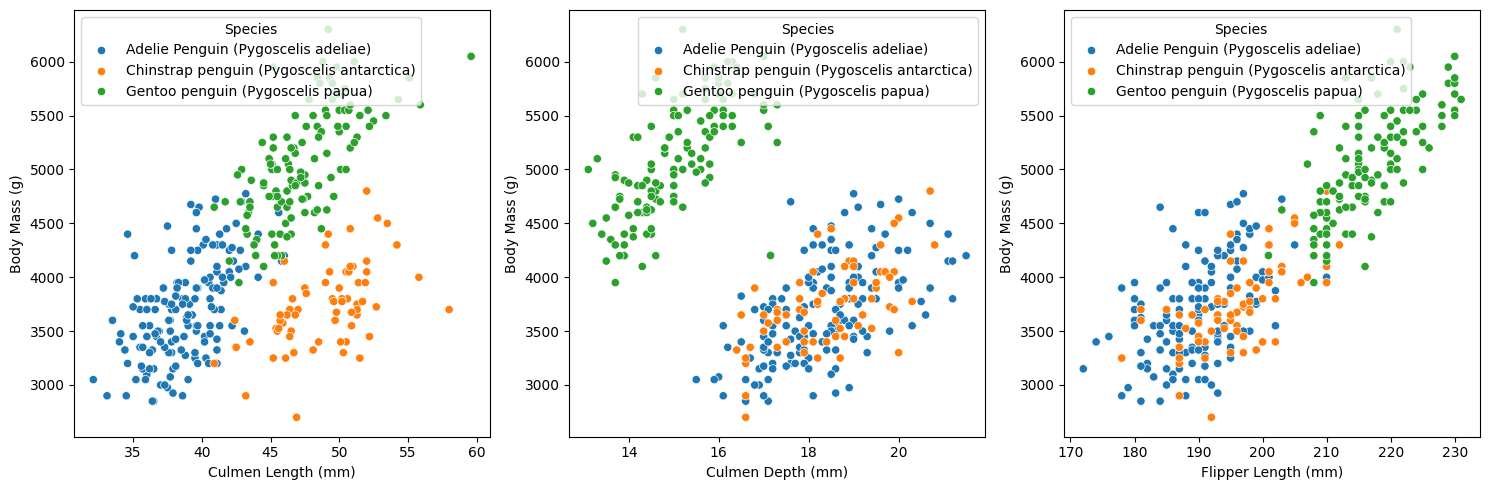

In [208]:
fig, axes = plt.subplots( 1,3, figsize=(15, 5))  

for i, col in enumerate(["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)"]):
    sns.scatterplot(ax=axes[i], x=iter[col], y=iter["Body Mass (g)"], hue= iter["Species"])


plt.tight_layout()

# Show the plots
plt.show()

In the abvove three graphs we can see that the 

(Gentoo Penguin are the heaviest among the three species)
Culmen Length VS Body Mass -> It is clustered according to the three species 
Culmen Depth VS Body Mass -> It is inversly correlated

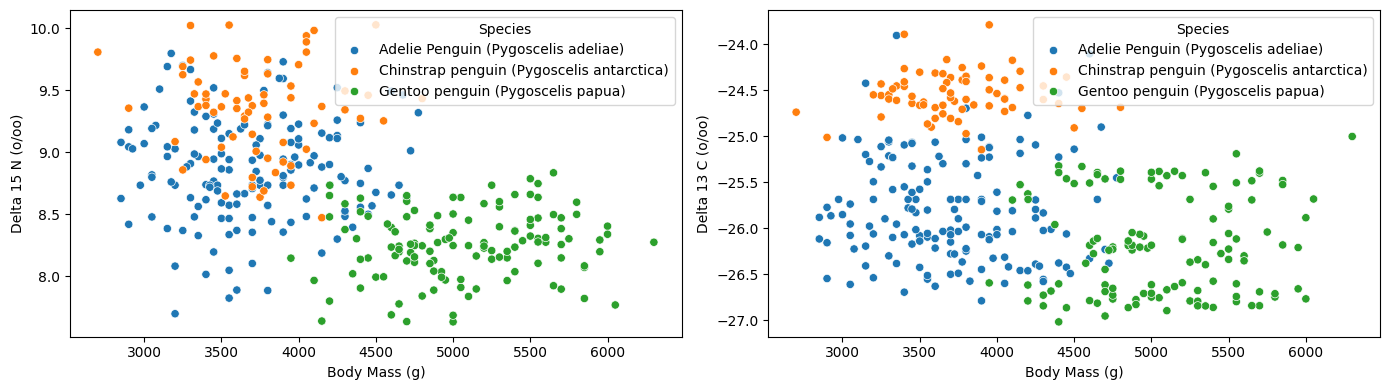

In [209]:

fig, axis = plt.subplots(1, 2, figsize = (14,4))

sns.scatterplot(ax = axis[0],  x = iter["Body Mass (g)"], y = iter["Delta 15 N (o/oo)"], hue = iter["Species"])
sns.scatterplot(ax = axis[1],  x = iter["Body Mass (g)"], y = iter["Delta 13 C (o/oo)"], hue = iter["Species"])

plt.tight_layout()
plt.show()


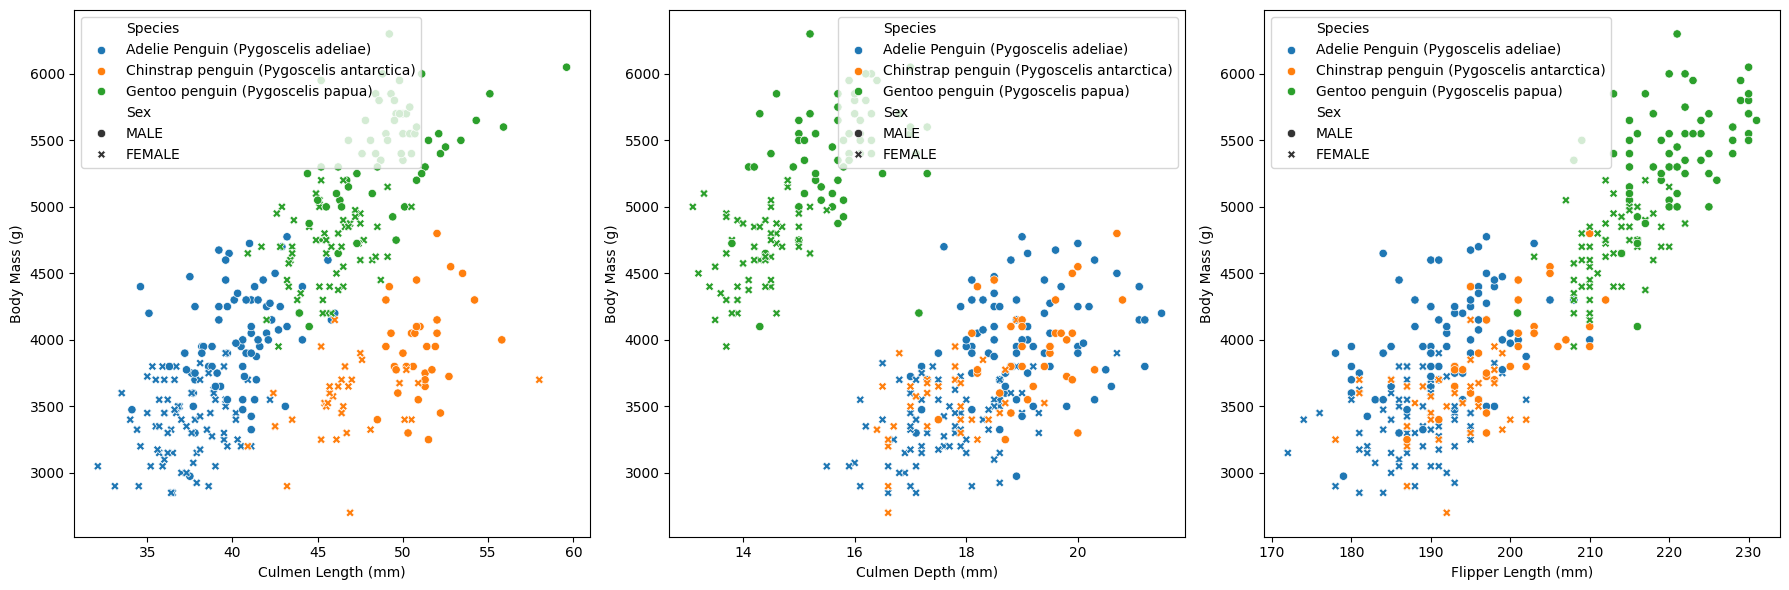

In [210]:
fig, axes = plt.subplots( 1,3, figsize=(18, 6))  

for i, col in enumerate(["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)"]):
    sns.scatterplot(ax=axes[i], x=iter[col], y=iter["Body Mass (g)"], hue= iter["Species"], style= iter["Sex"])


plt.tight_layout()

# Show the plots
plt.show()